# Line Search and Golden Search Evaluation

In [40]:
from numpy import arange
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import math

                     ---------------Line Search---------------

I.Function f:
 1)Implemented method for f:
  Minimum given when x= 13.67239885032177 and Minimum function value f(x)= -14431.482938543673
 2)Scipy method for f
  Minimum given when x= 13.672398738385635 and Minimum function value f(x)= -14431.482938543684


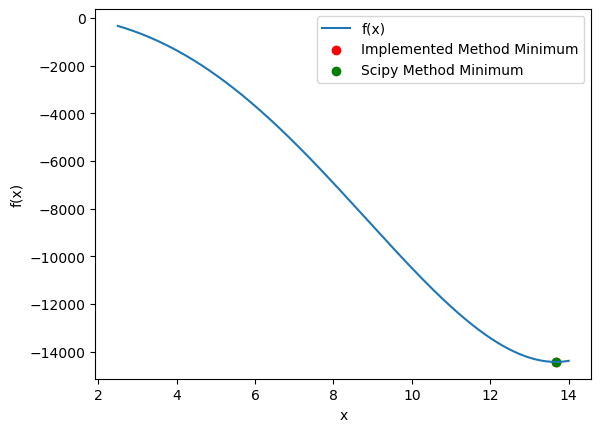

II.Function g: 
 1)Implemented method for g:
  Minimum value at x=  2.999999523162842  and g(x)=  -917.9995622635754
 2)Scipy method for f
  Minimum value at x=  2.999999508152614  and f(x)=  -917.9995484841919


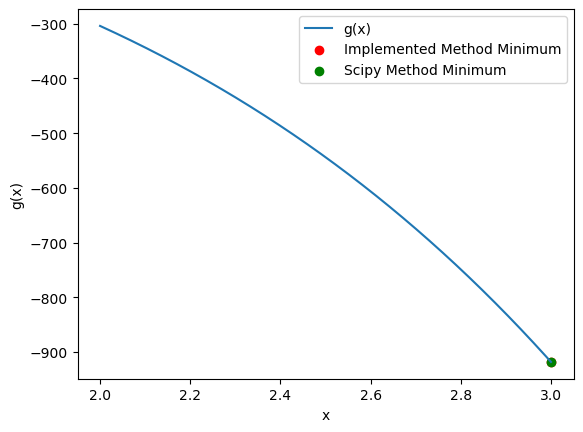

In [41]:
print("                     ---------------Line Search---------------")
print()

#Function f
def f(x):
    return x**4-16*x**3-45*x**2-20*x+203

#Derivative f
def df(x):
    return 4*x**3-48*x**2-90*x-20

#Function g
def g(x):
    return -x**5+2*x**4-23*x**3-12*x**2-36*x

#Derivative g
def dg(x):
    return -5*x**4+8*x**3-69*x**2-24*x-36

#Algo line_search
def line_search(function, derivative, x1, x2, tolerance):
    x=(x1+x2)/2
    dl=derivative(x1)
    du=derivative(x2)
    
    while abs(x1-x2)>tolerance:
        if dl * derivative(x) < 0: 
            x2 = x 
        else:
            x1 = x
        x = (x1 + x2) / 2
    
    return x


tolerance=1e-6


#Function f
print("I.Function f:")
terminal_left_f=2.5
terminal_right_f=14

#Implemented method
minimum_xf=line_search(f,df,terminal_left_f,terminal_right_f,tolerance)
f_of_minimum_x=f(line_search(f,df,terminal_left_f,terminal_right_f,tolerance))
print(" 1)Implemented method for f:")
print("  Minimum given when x=", minimum_xf, "and Minimum function value f(x)=",f_of_minimum_x)

#Scipy method
scipy_f=minimize_scalar(f, bounds=(terminal_left_f,terminal_right_f ), method='bounded', options={'xatol': 1e-6})
f_of_minimum_x_scipy = scipy_f.fun  
minimum_xf_scipy = scipy_f.x
print(" 2)Scipy method for f")
print("  Minimum given when x=", minimum_xf_scipy, "and Minimum function value f(x)=",f_of_minimum_x_scipy)

#Graph
x_values_f = np.linspace(terminal_left_f, terminal_right_f, 1000)
y_values_f = f(x_values_f)

plt.plot(x_values_f, y_values_f, label='f(x)')
plt.scatter(minimum_xf, f_of_minimum_x, color='red', label='Implemented Method Minimum')
plt.scatter(minimum_xf_scipy, f_of_minimum_x_scipy, color='green', label='Scipy Method Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


#Function g
print("II.Function g: ")
terminal_left_g=2
terminal_right_g=3

#Implemented method
minimum_xg=line_search(g,dg,terminal_left_g,terminal_right_g,tolerance)
g_of_minimum_x=g(line_search(g,dg,terminal_left_g,terminal_right_g,tolerance))
print(" 1)Implemented method for g:")
print("  Minimum value at x= ", minimum_xg, " and g(x)= ",g_of_minimum_x)

#Scipy method
scipy_g=minimize_scalar(g, bounds=(terminal_left_g,terminal_right_g ), method='bounded', options={'xatol': 1e-6})
g_of_minimum_x_scipy = scipy_g.fun  
minimum_xg_scipy = scipy_g.x
print(" 2)Scipy method for f")
print("  Minimum value at x= ", minimum_xg_scipy, " and f(x)= ",g_of_minimum_x_scipy)

#Graph
x_values_g = np.linspace(terminal_left_g, terminal_right_g, 1000)
y_values_g = g(x_values_g)

plt.plot(x_values_g, y_values_g, label='g(x)')
plt.scatter(minimum_xg, g_of_minimum_x, color='red', label='Implemented Method Minimum')
plt.scatter(minimum_xg_scipy, g_of_minimum_x_scipy, color='green', label='Scipy Method Minimum')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.show()


                     ---------------Golden Search---------------

I.Function f :
 1)Implemented method for f 
  Minimum value at x= 13.69742124849037 and Minimum function value f(x)= -14431.219148421702
 2)Scipy method for f
  Minimum value at x= 13.672398738385635 and Minimum function value f(x)= -14431.482938543684


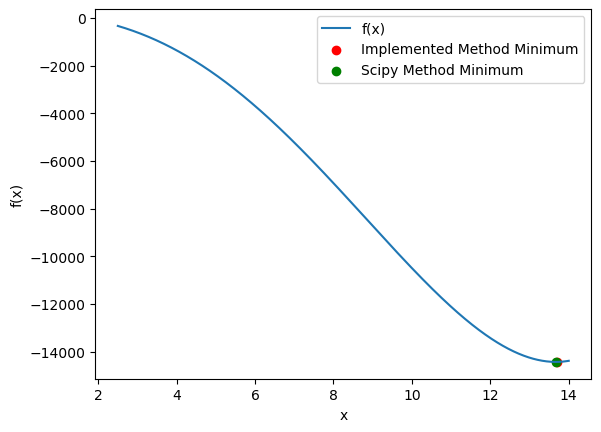


II.Function g :
 1)Implemented method for g 
  Minimum value at x= 2.999999565161051 and Minimum function value g(x)= -917.999600817917
 2)Scipy method for g
  Minimum value at x= 2.999999508152614 and Minimum function value g(x)= -917.9995484841919


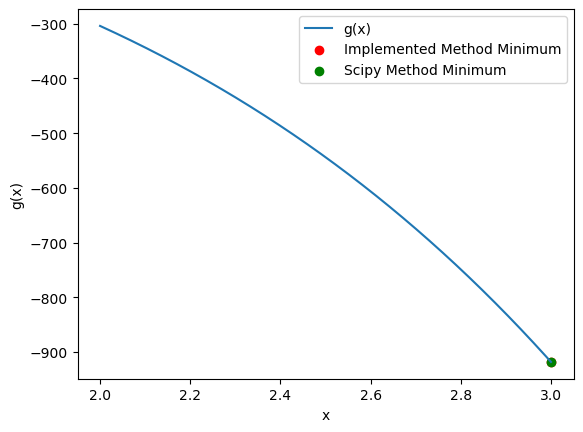

In [42]:
print("                     ---------------Golden Search---------------")
print()

#Function f
def f(x):
    return x**4-16*x**3-45*x**2-20*x+203

#Function g
def g(x):
    return -x**5+2*x**4-23*x**3-12*x**2-36*x

#Algo golden-search
def golden_search(f, x1, x4, tolerance=1e-6):

    phi = (1 + math.sqrt(5)) / 2

    c = 1 / phi
    x2 = x4 - c * (x4 - x1)
    f2 = f(x2)
    
    while abs(x4 - x1) > tolerance:
        x3 = x1 + c * (x4 - x1)
        f3 = f(x3)
        
        if f2 < f3:
            x4 = x3
        else:
            x1 = x2
            x2 = x3
            f2 = f3

        if abs(x4 - x1) <= tolerance:
            x_min = (x1 + x4) / 2
            return x_min, f(x_min)

    x_min = (x1 + x4) / 2
    return x_min, f(x_min)


#Function f
print("I.Function f :")
x1_f = 2.5
x4_f = 14

#Implemented Method
print(" 1)Implemented method for f ")
resultf = golden_search(f, x1_f, x4_f)
print("  Minimum value at x=", resultf[0], "and Minimum function value f(x)=",resultf[1])

#Scipy method
print(" 2)Scipy method for f")
scipy_f=minimize_scalar(f, bounds=(x1_f,x4_f ), method='bounded', options={'xatol': 1e-6})
f_of_minimum_x_scipy = scipy_f.fun  
minimum_xf_scipy = scipy_f.x
print("  Minimum value at x=", minimum_xf_scipy, "and Minimum function value f(x)=",f_of_minimum_x_scipy)

#Graph
x_values_f = np.linspace(x1_f, x4_f, 1000)
y_values_f = f(x_values_f)

plt.plot(x_values_f, y_values_f, label='f(x)')
plt.scatter(resultf[0], resultf[1], color='red', label='Implemented Method Minimum')
plt.scatter(minimum_xf_scipy, f_of_minimum_x_scipy, color='green', label='Scipy Method Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

print()

#Function g
print("II.Function g :")
x1_g = 2
x4_g = 3

#Implemented method
print(" 1)Implemented method for g ")
resultg = golden_search(g, x1_g, x4_g)
print("  Minimum value at x=", resultg[0], "and Minimum function value g(x)=",resultg[1])

#Scipy method
print(" 2)Scipy method for g")
scipy_g=minimize_scalar(g, bounds=(x1_g,x4_g ), method='bounded', options={'xatol': 1e-6})
g_of_minimum_x_scipy = scipy_g.fun  
minimum_xg_scipy = scipy_g.x
print("  Minimum value at x=", minimum_xg_scipy, "and Minimum function value g(x)=",g_of_minimum_x_scipy)

#Graph
x_values_g = np.linspace(x1_g, x4_g, 1000)
y_values_g = g(x_values_g)

plt.plot(x_values_g, y_values_g, label='g(x)')
plt.scatter(resultg[0], resultg[1], color='red', label='Implemented Method Minimum')
plt.scatter(minimum_xg_scipy, g_of_minimum_x_scipy, color='green', label='Scipy Method Minimum')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.show()
